In [1]:
%load_ext autoreload
%autoreload 2

# ExpectationValue

In [2]:
import numpy as np

In [3]:
from qiskit.circuit.library import RealAmplitudes
from qiskit.opflow import PauliSumOp

observable = PauliSumOp.from_list([("XX", 1), ("YY", 2), ("ZZ", 3)])
print("observable\n", observable)

ansatz = RealAmplitudes(num_qubits=2, reps=2)
print("ansatz\n", ansatz)

observable
 1.0 * XX
+ 2.0 * YY
+ 3.0 * ZZ
ansatz
      ┌──────────┐     ┌──────────┐     ┌──────────┐
q_0: ┤ Ry(θ[0]) ├──■──┤ Ry(θ[2]) ├──■──┤ Ry(θ[4]) ├
     ├──────────┤┌─┴─┐├──────────┤┌─┴─┐├──────────┤
q_1: ┤ Ry(θ[1]) ├┤ X ├┤ Ry(θ[3]) ├┤ X ├┤ Ry(θ[5]) ├
     └──────────┘└───┘└──────────┘└───┘└──────────┘


In [4]:
from qiskit.quantum_info import Statevector

expval = Statevector(ansatz.bind_parameters([0, 1, 1, 2, 3, 5])).expectation_value(
    observable.primitive
)
print(expval.real)

1.8420921273153719


/Users/aa406165/Git/qiskit-core/qiskit/quantum_info/states/statevector.py:444: DeprecationWarning: The SparsePauliOp.table method is deprecated as of Qiskit Terra 0.19.0 and will be removed no sooner than 3 months after the releasedate. Use SparsePauliOp.paulis method instead.
  for z, x, coeff in zip(oper.table.Z, oper.table.X, oper.coeffs)


## ExpectationValue class

In [5]:
from qiskit.evaluators import PauliExpectationValue

### PauliExpectationValue

Evaluate the expectation value by sampling. This supports both AerSimulator and IBMQ backends.

In [6]:
from qiskit.providers.aer import AerSimulator

backend = AerSimulator()

In [7]:
expval = PauliExpectationValue(ansatz, observable, backend=backend)
expval.evaluate([0, 1, 1, 2, 3, 5], shos=1000)

no max_experiments for backend 'aer_simulator'. Set 1000000 as max_experiments.


ExpectationValueResult(value=1.73828125, variance=11.052330017089844, confidence_interval=(1.5809510128551874, 1.8956114871448126))

In [8]:
# pre-binding

circuit = ansatz.bind_parameters([0, 1, 1, 2, 3, 5])
expval = PauliExpectationValue(circuit, observable, backend=backend)
expval.evaluate()

no max_experiments for backend 'aer_simulator'. Set 1000000 as max_experiments.


ExpectationValueResult(value=1.748046875, variance=11.297222137451172, confidence_interval=(1.5871174521715377, 1.9089762978284623))

In [9]:
# multi prameters

expval = PauliExpectationValue(ansatz, observable, backend=backend)
expval.evaluate([[0, 1, 1, 2, 3, 5], [1, 1, 2, 3, 5, 8]], shots=3000)

no max_experiments for backend 'aer_simulator'. Set 1000000 as max_experiments.


ExpectationValueArrayResult(values=array([1.90466667, 0.092     ]), variances=array([11.11550889, 10.52817511]), confidence_intervals=array([[ 1.81170721,  1.99762612],
       [-0.00212419,  0.18612419]]))

In [10]:
# can pass ndarray
expval = PauliExpectationValue(ansatz, observable, backend=backend)
expval.evaluate(np.array([[0, 1, 1, 2, 3, 5], [1, 1, 2, 3, 5, 8]]), shots=8192)

no max_experiments for backend 'aer_simulator'. Set 1000000 as max_experiments.


ExpectationValueArrayResult(values=array([1.8449707 , 0.15234375]), variances=array([11.16584462, 10.50961733]), confidence_intervals=array([[1.78857799, 1.90136342],
       [0.09558746, 0.20910004]]))

### Exact simulation by SaveExpectationValueVariance

In [11]:
from qiskit.evaluators import ExactExpectationValue

In [12]:
expval = ExactExpectationValue(ansatz, observable, backend=backend)
expval.evaluate([0, 1, 1, 2, 3, 5])

ExpectationValueResult(value=1.8420921273153708, variance=6.432763522806668, confidence_interval=None)

In [13]:
expval = ExactExpectationValue(ansatz, observable, backend=backend)
expval.evaluate(np.array([[0, 1, 1, 2, 3, 5], [1, 1, 2, 3, 5, 8]]))

ExpectationValueArrayResult(values=array([1.84209213, 0.15611897]), variances=array([6.43276352, 5.35681431]), confidence_intervals=array([None, None], dtype=object))

### Transpiled Circuits

In [14]:
from qiskit.test.mock import FakeBogota

backend = AerSimulator.from_backend(FakeBogota())

expval = PauliExpectationValue(ansatz, observable, backend=backend)
expval.set_transpile_options(initial_layout=[3, 2])
for circ in expval.transpiled_circuits:
    print(circ)
    print(circ.metadata)
    print()
print(expval.evaluate([0, 1, 1, 2, 3, 5]))

global phase: π
                                                                »
ancilla_0 -> 0 ─────────────────────────────────────────────────»
                                                                »
ancilla_1 -> 1 ─────────────────────────────────────────────────»
               ┌────┐┌──────────────┐┌────┐┌────────┐┌───┐┌────┐»
      q_1 -> 2 ┤ √X ├┤ Rz(θ[1] + π) ├┤ √X ├┤ Rz(3π) ├┤ X ├┤ √X ├»
               ├────┤├──────────────┤├────┤├────────┤└─┬─┘├────┤»
      q_0 -> 3 ┤ √X ├┤ Rz(θ[0] + π) ├┤ √X ├┤ Rz(3π) ├──■──┤ √X ├»
               └────┘└──────────────┘└────┘└────────┘     └────┘»
ancilla_2 -> 4 ─────────────────────────────────────────────────»
                                                                »
         c4: 2/═════════════════════════════════════════════════»
                                                                »
«                                                                          »
«ancilla_0 -> 0 ─────────────────────────────────

### Transpile options and Run options

In [15]:
expval = PauliExpectationValue(ansatz, observable, backend=backend)
# setter
expval.set_transpile_options(optimization_level=2)
expval.set_run_options(shots=100_000)
expval.evaluate([0, 1, 1, 2, 3, 5])

ExpectationValueResult(value=1.1681348678618921, variance=12.773920880372774, confidence_interval=(1.150214677862688, 1.1860550578610962))

In [16]:
# Method chain
expval.set_run_options(shots=8192).evaluate([0, 1, 1, 2, 3, 5])

ExpectationValueResult(value=1.257568359375, variance=12.720509469509125, confidence_interval=(1.1950937031197697, 1.3200430156302303))

In [17]:
# evaluate's option
expval.evaluate([0, 1, 1, 2, 3, 5], shots=300)

ExpectationValueResult(value=1.0466666666666666, variance=13.048844444444445, confidence_interval=(0.7148931112697748, 1.3784402220635585))

### Composite Evaluator

In [18]:
from qiskit.evaluators import JointEvaluator

In [19]:
len(expval.transpiled_circuits)

3

In [20]:
joint_evaluator = JointEvaluator([expval, expval, expval])  # can be different evaluator

In [21]:
len(joint_evaluator.transpiled_circuits)  # 3 × 3

9

In [22]:
joint_evaluator.evaluate([[0, 1, 1, 2, 3, 5], [1, 1, 2, 3, 5, 8], [1, 2, 3, 5, 8, 13]])

CompositeResult(items=[ExpectationValueResult(value=1.196533203125, variance=12.753029525279999, confidence_interval=(1.1339852269033444, 1.2590811793466556)), ExpectationValueResult(value=1.196533203125, variance=12.753029525279999, confidence_interval=(1.1339852269033444, 1.2590811793466556)), ExpectationValueResult(value=1.196533203125, variance=12.753029525279999, confidence_interval=(1.1339852269033444, 1.2590811793466556))])

### Readout error mitigation

In [23]:
from qiskit.evaluators.backends import ReadoutErrorMitigation

backend = AerSimulator.from_backend(FakeBogota())
mit_tensored = ReadoutErrorMitigation(
    backend, mitigation="tensored", refresh=600, shots=2000, mit_pattern=[[0], [1]]
)
mit_mthree = ReadoutErrorMitigation(
    backend, mitigation="mthree", refresh=600, shots=2000, qubits=[0, 1]
)
expval_raw = PauliExpectationValue(ansatz, observable, backend=backend)
expval_tensored = PauliExpectationValue(ansatz, observable, backend=mit_tensored)
expval_mthree = PauliExpectationValue(ansatz, observable, backend=mit_mthree)
shots = 4000
print(
    f"w/o mitigation shots={shots}, result={expval_raw.evaluate([0, 1, 1, 2, 3, 5], shots=shots)}"
)
print(
    f"w/ tensored mitigation shots={shots}, result={expval_tensored.evaluate([0, 1, 1, 2, 3, 5], shots=shots)}"
)
print(
    f"w/ M3 mitigation shots={shots}, result={expval_mthree.evaluate([0, 1, 1, 2, 3, 5], shots=shots)}"
)

w/o mitigation shots=4000, result=ExpectationValueResult(value=1.1075000000000004, variance=12.85502275, confidence_interval=(1.017528244504402, 1.1974717554955987))
w/ tensored mitigation shots=4000, result=ExpectationValueResult(value=1.3769135720086392, variance=12.417292055968211, confidence_interval=(1.2889905713608731, 1.4648365726564052))
w/ M3 mitigation shots=4000, result=ExpectationValueResult(value=1.339282882703353, variance=12.357961780904924, confidence_interval=(1.2516991015116294, 1.4268666638950764))


### Gradient of expectation value

In [24]:
from qiskit.evaluators.expectation_value.expectation_value_gradient import (
    FiniteDiffGradient,
    ParameterShiftGradient,
)

In [25]:
exact_expval = ExactExpectationValue(ansatz, observable, backend=AerSimulator())
exact_findiff = FiniteDiffGradient(exact_expval, 1e-8)
print(f"fin diff of exact {exact_findiff.evaluate([0, 1, 1, 2, 3, 5]).values}")

shots = 2000
findiff = FiniteDiffGradient(expval_raw, 1e-1)
paramshift = ParameterShiftGradient(expval_raw)
print(f"fin diff w/o mit {findiff.evaluate([0, 1, 1, 2, 3, 5], shots=shots).values}")
print(
    f"param shift w/o mit {paramshift.evaluate([0, 1, 1, 2, 3, 5], shots=shots).values}"
)

findiff = FiniteDiffGradient(expval_mthree, 1e-1)
paramshift = ParameterShiftGradient(expval_mthree)
print(f"fin diff w/  mit {findiff.evaluate([0, 1, 1, 2, 3, 5], shots=shots).values}")
print(
    f"param shift w/  mit {paramshift.evaluate([0, 1, 1, 2, 3, 5], shots=shots).values}"
)

fin diff of exact [0.13510324 1.87744373 1.03215423 1.87744376 1.48950676 2.15662823]
fin diff w/o mit [0.94 1.57 1.49 0.69 1.88 1.02]
param shift w/o mit [0.1995 1.3255 0.7675 1.2675 0.929  1.3735]
fin diff w/  mit [0.06106742 3.0890703  0.56318048 1.85796864 2.7063221  2.39636459]
param shift w/  mit [0.23546471 1.53285544 0.83488993 1.467849   1.2147093  1.71229405]


### VQE by Scipy optimizer

In [26]:
from scipy.optimize import minimize

shots = 1000
backend = AerSimulator()
expval = PauliExpectationValue(ansatz, observable, backend=backend, append=True)
paramshift = ParameterShiftGradient(expval)
# this may take a long time...
result = minimize(
    lambda x: expval.evaluate(x, shots=shots).value,
    np.zeros(6),
    jac=lambda x: paramshift.evaluate(x, shots=shots).values,
)
print(result)

no max_experiments for backend 'aer_simulator'. Set 1000000 as max_experiments.


      fun: -6.0
 hess_inv: array([[ 0.17516638,  0.06071883, -0.09190143,  0.08388865, -0.05638726,
         0.08320484],
       [ 0.06071883,  0.20020623, -0.13111946, -0.06992609, -0.02766583,
         0.08891901],
       [-0.09190143, -0.13111946,  0.38181937,  0.20960785,  0.08509806,
        -0.15101621],
       [ 0.08388865, -0.06992609,  0.20960785,  0.49653314,  0.14747615,
         0.03903493],
       [-0.05638726, -0.02766583,  0.08509806,  0.14747615,  0.38211829,
         0.22851907],
       [ 0.08320484,  0.08891901, -0.15101621,  0.03903493,  0.22851907,
         0.32157402]])
      jac: array([ 0.008,  0.072, -0.064, -0.076,  0.046, -0.026])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 28
      nit: 14
     njev: 28
   status: 2
  success: False
        x: array([1.48090194, 0.78693204, 3.25118711, 1.6565948 , 1.97896911,
       1.17213755])


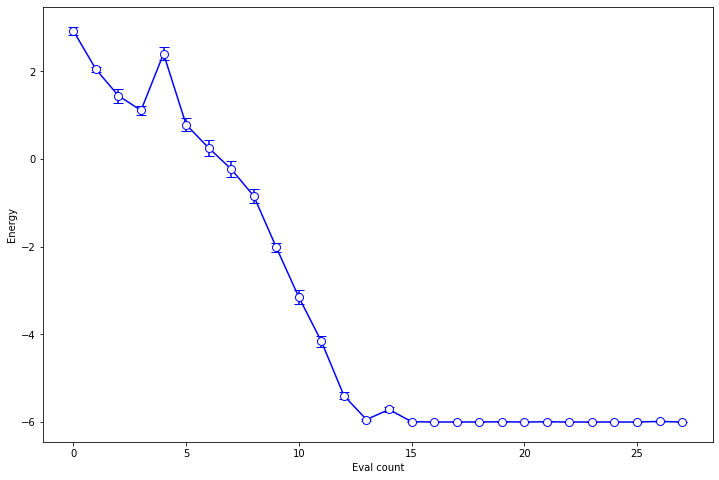

In [27]:
import matplotlib.pyplot as plt
from qiskit.evaluators.results import ExpectationValueResult

plt.figure(figsize=(12, 8))
y = [h.value for h in expval.history if isinstance(h, ExpectationValueResult)]
x = list(range(len(y)))
yerr = np.array(
    [
        tuple(abs(c - h.value) for c in h.confidence_interval)
        for h in expval.history
        if isinstance(h, ExpectationValueResult)
    ]
).transpose()
plt.plot(y, color="blue")
plt.errorbar(
    x,
    y,
    yerr=yerr,
    capsize=5,
    fmt="o",
    markersize=8,
    ecolor="blue",
    markeredgecolor="blue",
    color="w",
)
plt.xlabel("Eval count")
plt.ylabel("Energy")
plt.show()